In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
from sklearn.base import BaseEstimator
import warnings
warnings.filterwarnings('ignore')

In [7]:
class MyFake(BaseEstimator):
    def fit(self, X, y):
        pass
    def predict(self,X):
        return np.zeros( (len(X), 1))

from sklearn.datasets import load_digits
digits= load_digits()
print(digits.data)
print(digits.target)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [8]:
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test=train_test_split(digits.data, y, random_state=11)

In [9]:
print(y_test.shape)
print(pd.Series(y_test).value_counts())  # 판다스 시리즈 만들기

(450,)
0    405
1     45
Name: count, dtype: int64


In [10]:
fakeclf=MyFake()
fakeclf.fit(X_train, y_train)
fakepred=fakeclf.predict(X_test)
print(f'정확도: {accuracy_score(y_test, fakepred):.3f}')

정확도: 0.900


In [11]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

In [14]:
from sklearn.metrics import recall_score, precision_score

print(recall_score(y_test, fakepred))
print(precision_score(y_test, fakepred))   

0.0
0.0


In [15]:
X_titanic_df = pd.read_csv('data/titanic_X.csv')
y_titanic_df = pd.read_csv('data/titanic_y.csv')
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, 
test_size = 0.2, random_state = 0)

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
matrix=confusion_matrix(y_test, pred)
matrix

array([[91, 19],
       [24, 45]], dtype=int64)

In [50]:
(matrix[0,0] + matrix[1,1]) / matrix.sum()

0.7597765363128491

In [47]:
pred2=(dt_clf.predict_proba(X_test)[:,1] >0.4).astype(int)

In [48]:
matrix2=confusion_matrix(y_test, pred2)
matrix2

array([[90, 20],
       [23, 46]], dtype=int64)

In [49]:
print('재현율: ', matrix2[1,1] / (matrix2[1,0] + matrix2[1,1]))
print('정밀도: ', matrix2[1,1] / (matrix2[0,1] + matrix2[1,1]))

재현율:  0.6666666666666666
정밀도:  0.696969696969697


In [56]:
pred_proba=dt_clf.predict_proba(X_test)
pred=dt_clf.predict(X_test)
print('predict_proba 결과 shape: ', pred_proba.shape)
print('predict 결과 10개만: ', pred_proba[:3])
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)],axis=1)

print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

predict_proba 결과 shape:  (179, 2)
predict 결과 10개만:  [[1. 0.]
 [1. 0.]
 [1. 0.]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [58]:
from sklearn.preprocessing import Binarizer
X = [[ 1, -1, 2],[ 2, 0, 0],[ 0, 1.1, 1.2]]
binarizer = Binarizer(threshold= 1.1) 
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [59]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)

In [74]:
pred_proba=lr_clf.predict_proba(X_test)
pred=lr_clf.predict(X_test)
print('predict_proba 결과 shape: ', pred_proba.shape)
print('predict 결과 10개만: ', pred[:10])
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

predict_proba 결과 shape:  (179, 2)
predict 결과 10개만:  [0 0 0 1 1 0 1 1 0 1]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.85016752 0.14983248 0.        ]
 [0.87512771 0.12487229 0.        ]
 [0.9254905  0.0745095  0.        ]]


In [ ]:
pred_proba_result=np.concatenate([pred_proba, pred.reshape(-1,1)],axis=1)
print(pred_proba_result)

In [ ]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold= 0.3)  # 크야만 1, 작거나 같으면 0
print(binarizer.fit_transform(pred_proba_result))

In [ ]:
binarizer = Binarizer(threshold= 1.1) 
print(binarizer.fit_transform(X))

In [70]:
pred2=(pred_proba[:,1] >0.5).astype(int)

In [76]:
binarizer = Binarizer(threshold= 0.5) 
pred3=binarizer.fit_transform(pred_proba, pred.reshape(-1,1))

In [ ]:
print(accuracy_score(pred))
print(accuracy_score(pred2))
print(accuracy_score(pred3))

In [81]:

def get_clf_eval(y_test, pred):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)    # 정밀도
    recall=recall_score(y_test,pred)          # 재현율
    print('오차행렬: ', confusion)
    print(f'정확도: {accuracy:.3f}, 정밀도: {precision:.3f}, 재현률: {recall:.3f}')

In [82]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
def get_eval_by_threshold(y_test ,pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
    get_clf_eval(y_test , custom_predict)
get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.4
임곗값: 0.45
임곗값: 0.5
임곗값: 0.55
임곗값: 0.6
오차행렬:  [[101   9]
 [ 26  43]]
정확도: 0.804, 정밀도: 0.827, 재현률: 0.623


In [83]:
pred_proba=lr_clf.predict_proba(X_test)
pred=lr_clf.predict(X_test)
print('predict_proba 결과 shape: ', pred_proba.shape)
print('predict 결과 10개만: ', pred[:10])
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

predict_proba 결과 shape:  (179, 2)
predict 결과 10개만:  [0 0 0 1 1 0 1 1 0 1]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.85016752 0.14983248 0.        ]
 [0.87512771 0.12487229 0.        ]
 [0.9254905  0.0745095  0.        ]]


In [91]:
from sklearn.metrics import precision_recall_curve
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)
print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:10])

반환된 분류 결정 임곗값 배열의 Shape: (172,)
반환된 precisions 배열의 Shape: (173,)
반환된 recalls 배열의 Shape: (173,)
thresholds 5 sample: [0.04310391 0.0572492  0.06058916 0.06971505 0.07001447]
precisions 5 sample: [0.38547486 0.38764045 0.38983051 0.39204545 0.39428571]
recalls 5 sample: [1.         1.         1.         1.         1.         1.
 1.         1.         0.98550725 0.98550725]


In [86]:
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index],2))
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150 165]
샘플용 10개의 임곗값:  [0.04 0.1  0.13 0.15 0.18 0.26 0.36 0.5  0.61 0.71 0.84 0.92]
샘플 임계값별 정밀도:  [0.385 0.415 0.455 0.504 0.562 0.619 0.695 0.731 0.827 0.919 1.    1.   ]
샘플 임계값별 재현율:  [1.    0.986 0.957 0.942 0.913 0.87  0.826 0.71  0.623 0.493 0.319 0.101]


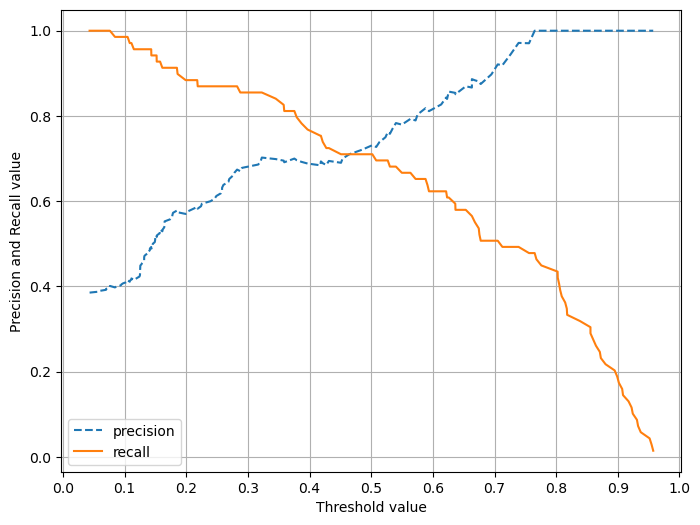

In [87]:
# precision_recall_curve를 이용한 정밀도 재현율 곡선
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
def precision_recall_curve_plot(y_test , pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]   # 정밀도 재현  율 데이터가 1개 더 많으므로/ 맨 마직막행
    plt.plot(thresholds, precisions[0:threshold_boundary], '--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [92]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print(f'F1 스코어 : {f1:.4f}')

F1 스코어 : 0.7206


In [94]:
print(accuracy_score(y_test,pred))
print(precision_score(y_test,pred))
print(recall_score(y_test,pred))

0.7877094972067039
0.7313432835820896
0.7101449275362319


In [95]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1:{f1:.4f}')

In [101]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1:{f1:.4f}')

In [99]:
thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
임곗값: 0.45
임곗값: 0.5
임곗값: 0.55
임곗값: 0.6
오차 행렬
[[101   9]
 [ 26  43]]
정확도: 0.8045, 정밀도: 0.8269, 재현율: 0.6232, F1:0.7107


In [105]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test , pred_proba_c1):
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)
    plt.plot(fprs , tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random') 
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

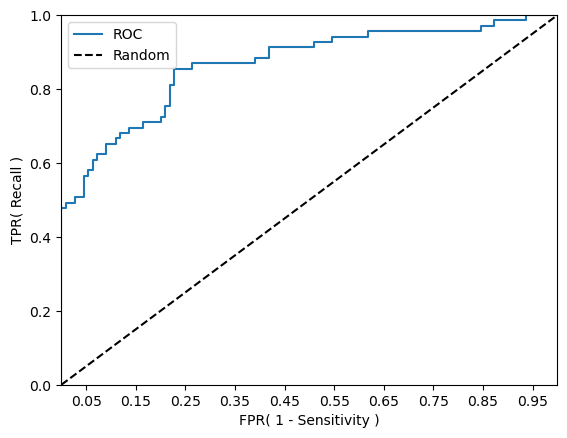

In [112]:
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [108]:
from sklearn.metrics import roc_auc_score
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print(f'ROC AUC 값: {roc_score:.4f}')

ROC AUC 값: 0.8671


In [110]:
## 총정리
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print(f'''정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, 
    F1: {f1:.4f}, AUC:{roc_auc:.4f}''')

# 정확도/정밀도/재현율/F1_Score/ROC_ACC_score  ==지표일뿐 확실시할 수 없음

In [111]:
get_clf_eval(y_test, pred, pred_proba )

오차 행렬
[[92 18]
 [20 49]]
정확도: 0.7877, 정밀도: 0.7313, 재현율: 0.7101, 
    F1: 0.7206, AUC:0.8671


In [ ]:
## 인디언 당뇨병 에측

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [120]:
from sklearn.datasets import load_diabetes
diabets_data=pd.read_csv('data/diabetes.csv')
X=diabets_data.iloc[:,:-1]
y=diabets_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

dt_clf=DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)
pred=dt_clf.predict(X_test)
pred_proba= dt_clf.predict_proba(X_test)[:,1]

print(accuracy_score(y_test, pred))
print(precision_score(y_test, pred))
print(recall_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(f1_score(y_test, pred))
print( roc_score)

0.7662337662337663
0.6078431372549019
0.6595744680851063
[[87 20]
 [16 31]]
0.6326530612244897
0.8670619235836626


In [190]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_clf=DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)
pred=dt_clf.predict(X_test)
pred_proba= dt_clf.predict_proba(X_test)

print(confusion_matrix(y_test, pred))
print('f1_score weighted: ', f1_score(y_test, pred, average='weighted'))
print('f1_score micro: ',f1_score(y_test, pred, average='micro'))
print('roc_auc_score ovo: ',roc_auc_score(y_test, pred_proba, multi_class='ovo'))
print('roc_auc_score ovr: ',roc_auc_score(y_test, pred_proba, multi_class='ovr'))

[[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]
f1_score weighted:  0.9330303030303031
f1_score micro:  0.9333333333333333
roc_auc_score ovo:  0.9545454545454546
roc_auc_score ovr:  0.9530303030303031


In [165]:
# 다중 분류 : 정확도 평가

from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score

lr_clf= LinearRegression()
data=load_iris()
X=data.data
y=data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=11)
lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)


In [ ]:
## 교차검정/ 검증 비교하기 -비슷하게 나오면 됨

In [189]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(dt_clf,X_train, y_train, scoring = 'f1_micro', cv = 5)
# accuracy, precision, recall, f1, roc_auc
scores

array([0.91666667, 0.91666667, 1.        , 0.91666667, 1.        ])

In [183]:
np.mean(scores)

0.95

In [187]:
pred=dt_clf.predict(X_test)
accuracy_score(y_test, pred)

0.9333333333333333

[Text(0.3076923076923077, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [41, 40, 39]'),
 Text(0.23076923076923078, 0.75, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.38461538461538464, 0.75, 'x[3] <= 1.55\ngini = 0.5\nsamples = 79\nvalue = [0, 40, 39]'),
 Text(0.15384615384615385, 0.5833333333333334, 'x[2] <= 5.25\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(0.07692307692307693, 0.4166666666666667, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.23076923076923078, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.5833333333333334, 'x[3] <= 1.75\ngini = 0.136\nsamples = 41\nvalue = [0, 3, 38]'),
 Text(0.38461538461538464, 0.4166666666666667, 'x[1] <= 2.6\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(0.3076923076923077, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.38461

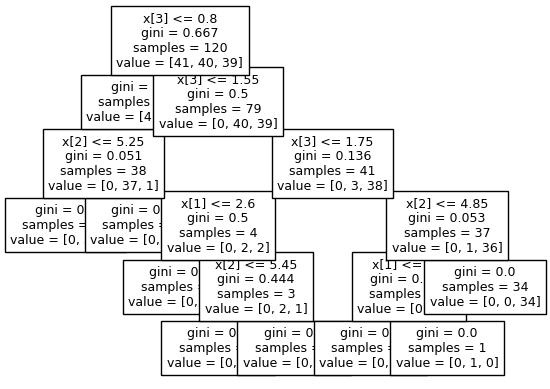

In [199]:
plot_tree(dt_clf, fontsize=9 )